# Analysis of variation in SARS-CoV2 
Compare variants if de-duplication (after bwa-mem alignment) and filtering (in LoFreq variants calling) were implemented or not. 

Galaxy history: https://usegalaxy.org/u/hanmei/h/deng2020dupfilter

In [1]:
from datetime import date

today = date.today()
print("Last run:", today)

Last run: 2020-06-26


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import matplotlib.pyplot as plt
%matplotlib inline

# Panadas display options
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# Seaborn markers and colors:
fc_palette = {".":'b',"MISSENSE":'orange',"NONSENSE":'r','SILENT':'g', 'NONE':'b'}
markers = {".":"*", "MISSENSE":"^", "NONSENSE":"X", "SILENT":"o", "NONE":"."}

In [3]:
# Load variants 
# These are copies of the last four datasets produced in the galaxy history https://usegalaxy.org/u/hanmei/h/deng2020dupfilter. 
# These dataset are collapsed collections containing VCF data processed by SNPsift extract fields
!cat Galaxy1569-undeduped-filtered.tabular | sed s/EFF\\\[\\\*\\\]\.//g > var_undeduped_filtered.tab
!cat Galaxy1570-undeduped-unfiltered.tabular | sed s/EFF\\\[\\\*\\\]\.//g > var_undeduped_unfiltered.tab
!cat Galaxy1571-deduped-filtered.tabular | sed s/EFF\\\[\\\*\\\]\.//g > var_deduped_filtered.tab
!cat Galaxy1572-deduped-unfiltered.tabular | sed s/EFF\\\[\\\*\\\]\.//g > var_deduped_unfiltered.tab


In [4]:
# Create dataframe with variants
var_undeduped_filtered = pd.read_csv('var_undeduped_filtered.tab', sep='\t')
var_undeduped_unfiltered = pd.read_csv('var_undeduped_unfiltered.tab', sep='\t')
var_deduped_filtered = pd.read_csv('var_deduped_filtered.tab', sep='\t')
var_deduped_unfiltered = pd.read_csv('var_deduped_unfiltered.tab', sep='\t')

!rm var_undeduped_filtered.tab var_undeduped_unfiltered.tab var_deduped_filtered.tab var_deduped_unfiltered.tab 

In [5]:
# Restrict variants to those above 5% AF
var_undeduped_filtered = var_undeduped_filtered[ var_undeduped_filtered['AF']>=0.05]
var_undeduped_unfiltered = var_undeduped_unfiltered[ var_undeduped_unfiltered['AF']>=0.05]
var_deduped_filtered = var_deduped_filtered[ var_deduped_filtered['AF']>=0.05]
var_deduped_unfiltered = var_deduped_unfiltered[ var_deduped_unfiltered['AF']>=0.05]


In [6]:
# Create column with change type (e.g., G29711T)
var_undeduped_filtered['change'] = var_undeduped_filtered['REF']+var_undeduped_filtered['POS'].astype(str)+var_undeduped_filtered['ALT']
var_undeduped_unfiltered['change'] = var_undeduped_unfiltered['REF']+var_undeduped_unfiltered['POS'].astype(str)+var_undeduped_unfiltered['ALT']
var_deduped_filtered['change'] = var_deduped_filtered['REF']+var_deduped_filtered['POS'].astype(str)+var_deduped_filtered['ALT']
var_deduped_unfiltered['change'] = var_deduped_unfiltered['REF']+var_deduped_unfiltered['POS'].astype(str)+var_deduped_unfiltered['ALT']


In [7]:
var_undeduped_filtered.head(2)

,Sample,CHROM,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,change
3,SRR11859133,NC_045512,241,C,T,49314.0,4476,0.985702,0,"0,0,2396,2070",.,.,.,.,.,C241T
48,SRR11859133,NC_045512,1059,C,T,49314.0,4756,0.988646,0,"1,1,2357,2383",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,aCc/aTc,C1059T


In [8]:
var_undeduped_unfiltered.head(2)

,Sample,CHROM,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,change
95,SRR11859133,NC_045512,241,C,T,49314.0,4476,0.985702,0,"0,0,2396,2070",.,.,.,.,.,C241T
1227,SRR11859133,NC_045512,1059,C,T,49314.0,4756,0.988646,0,"1,1,2357,2383",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,aCc/aTc,C1059T


In [9]:
var_deduped_filtered.head(2)

,Sample,CHROM,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,change
0,SRR11859133,NC_045512,241,C,T,49314.0,2142,0.987862,0,"0,0,1161,974",.,.,.,.,.,C241T
24,SRR11859133,NC_045512,1059,C,T,49314.0,2381,0.990760,0,"1,1,1180,1194",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,aCc/aTc,C1059T


In [10]:
var_deduped_unfiltered.head(2)

,Sample,CHROM,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,change
65,SRR11859133,NC_045512,241,C,T,49314.0,2142,0.987862,0,"0,0,1161,974",.,.,.,.,.,C241T
816,SRR11859133,NC_045512,1059,C,T,49314.0,2381,0.990760,0,"1,1,1180,1194",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,aCc/aTc,C1059T


In [11]:
# Extract metadata from SRA accessions and stick into a dataframe
md = pd.read_csv('read_metadata.tsv',sep="\t")

In [12]:
md.head(2)

,study_accession,experiment_accession,experiment_title,experiment_desc,organism_taxid,organism_name,library_strategy,library_source,library_selection,sample_accession,sample_title,instrument,total_spots,total_size,run_accession,run_total_spots,run_total_bases,run_alias,sra_url_alt1,sra_url_alt2,sra_url,experiment_alias,Titer (Ct value),Sequencing Platform,Distinguishing Info,strain,isolate,collected_by,collection_date,geo_loc_name,host,host_disease,isolation_source,lat_lon,BioSampleModel,sra_url_alt,ena_fastq_url,ena_fastq_ftp
0,SRP265005,SRX8409213,Severe acute respiratory syndrome coronavirus 2,Severe acute respiratory syndrome coronavirus 2,2697049,Severe acute respiratory syndrome coronavirus 2,AMPLICON,METAGENOMIC,PCR,SRS6721570,NaN,Illumina HiSeq 1500,13478,1016143,SRR11859166,13478,1886920,UC13.fastq.gz,https://storage.googleapis.com/sra-pub-src-9/S...,https://sra-pub-src-9.s3.amazonaws.com/SRR1185...,https://sra-download.ncbi.nlm.nih.gov/traces/s...,NaN,27.5,HiSeq,13,Not applicable,Not applicable,University of Califronia San Francisco,2020-03-02,USA:California,Homo sapiens,Acue infection,clinical sample,36.7783 N 119.4179 W,Pathogen.cl,NaN,NaN,NaN
1,SRP265005,SRX8409251,Severe acute respiratory syndrome coronavirus 2,Severe acute respiratory syndrome coronavirus 2,2697049,Severe acute respiratory syndrome coronavirus 2,AMPLICON,METAGENOMIC,PCR,SRS6721608,NaN,NextSeq 550,8346,562617,SRR11859128,8346,1168440,UC10.fastq.gz,https://sra-pub-src-10.s3.amazonaws.com/SRR118...,https://storage.googleapis.com/sra-pub-src-11/...,https://sra-download.ncbi.nlm.nih.gov/traces/s...,NaN,26.6,NextSeq,10,Not applicable,Not applicable,California Department of Public Health,2020-03-05,USA:California,Homo sapiens,Acue infection,clinical sample,36.7783 N 119.4179 W,Pathogen.cl,NaN,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR118/028...,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR118/...


In [13]:
# Add metadata to variant data
var_undeduped_filtered = pysqldf('select var_undeduped_filtered.*, study_accession,library_strategy,library_source,library_selection,run_alias from var_undeduped_filtered left join md on Sample = run_accession')
var_undeduped_unfiltered = pysqldf('select var_undeduped_unfiltered.*, study_accession,library_strategy,library_source,library_selection,run_alias from var_undeduped_unfiltered left join md on Sample = run_accession')
var_deduped_filtered = pysqldf('select var_deduped_filtered.*, study_accession,library_strategy,library_source,library_selection,run_alias from var_deduped_filtered left join md on Sample = run_accession')
var_deduped_unfiltered = pysqldf('select var_deduped_unfiltered.*, study_accession,library_strategy,library_source,library_selection,run_alias from var_deduped_unfiltered left join md on Sample = run_accession')


In [14]:
var_undeduped_filtered.head(2)

,Sample,CHROM,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,change,study_accession,library_strategy,library_source,library_selection,run_alias
0,SRR11859133,NC_045512,241,C,T,49314.0,4476,0.985702,0,"0,0,2396,2070",.,.,.,.,.,C241T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC48.fastq.gz
1,SRR11859133,NC_045512,1059,C,T,49314.0,4756,0.988646,0,"1,1,2357,2383",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,aCc/aTc,C1059T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC48.fastq.gz


In [15]:
var_undeduped_unfiltered.head(2)

,Sample,CHROM,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,change,study_accession,library_strategy,library_source,library_selection,run_alias
0,SRR11859133,NC_045512,241,C,T,49314.0,4476,0.985702,0,"0,0,2396,2070",.,.,.,.,.,C241T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC48.fastq.gz
1,SRR11859133,NC_045512,1059,C,T,49314.0,4756,0.988646,0,"1,1,2357,2383",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,aCc/aTc,C1059T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC48.fastq.gz


In [16]:
var_deduped_filtered.head(2)

,Sample,CHROM,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,change,study_accession,library_strategy,library_source,library_selection,run_alias
0,SRR11859133,NC_045512,241,C,T,49314.0,2142,0.987862,0,"0,0,1161,974",.,.,.,.,.,C241T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC48.fastq.gz
1,SRR11859133,NC_045512,1059,C,T,49314.0,2381,0.990760,0,"1,1,1180,1194",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,aCc/aTc,C1059T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC48.fastq.gz


In [17]:
var_deduped_unfiltered.head(2)

,Sample,CHROM,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,change,study_accession,library_strategy,library_source,library_selection,run_alias
0,SRR11859133,NC_045512,241,C,T,49314.0,2142,0.987862,0,"0,0,1161,974",.,.,.,.,.,C241T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC48.fastq.gz
1,SRR11859133,NC_045512,1059,C,T,49314.0,2381,0.990760,0,"1,1,1180,1194",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,aCc/aTc,C1059T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC48.fastq.gz


In [18]:
# Create annotation dictionary
# This dictionary handles specific features of NC_045512.2

from collections import defaultdict
from Bio import SeqIO
from Bio.SeqUtils import GC
annot = defaultdict(list)

genome = SeqIO.read("NC_045512.2.genbank", "genbank")

for feature in genome.features:
    annot['type'].append(feature.type)
    annot['start'].append(feature.location.start)
    annot['end'].append(feature.location.end)
    annot['gc'].append( GC(genome.seq[feature.location.start:feature.location.end]))
    for base in ['A','C','G','T']:
        annot[base].append(genome.seq[feature.location.start:feature.location.end].count(base))
    if feature.type in ['mat_peptide','CDS']:
        annot['func'].append(feature.qualifiers['product'][0])
        annot['gene'].append(feature.qualifiers['gene'][0])
    elif feature.type == 'stem_loop':
        annot['func'].append(feature.qualifiers['function'][0])
        annot['gene'].append('.')
    elif feature.type == 'gene':
        annot['gene'].append(feature.qualifiers['gene'][0])
        annot['func'].append('.')
    else:
        annot['func'].append('.')
        annot['gene'].append('.')
    annot['strandedness'].append('.')

In [19]:
# Converting to a dataframe
annot = pd.DataFrame.from_dict(annot)

In [20]:
annot.head(2)

,type,start,end,gc,A,C,G,T,func,gene,strandedness
0,source,0,29903,37.972779,8954,5492,5863,9594,.,.,.
1,5'UTR,0,265,44.528302,67,63,55,80,.,.,.


In [21]:
# Clean annotations by removing redundancy
annot.drop(index=[0,3,19],inplace=True)
annot.drop(index=annot[annot['type']=='gene'].index,inplace=True)

In [22]:
# Create translation dict to shorten the names of functional elements
translate_names = {'.':'.',
 'leader protein':'leader',
 'nsp2':'nsp2',
 'nsp3':'nsp3',
 'nsp4':'nsp4',
 '3C-like proteinase':'3Cpro',
 'nsp6':'nsp6',
 'nsp7':'nsp7',
 'nsp8':'nsp8',
 'nsp9':'nsp9',
 'nsp10':'nsp10',
 'RNA-dependent RNA polymerase':'RdRp',
 'helicase':'helicase',
 "3'-to-5' exonuclease":'ExoN',
 'endoRNAse':'endoR',
 "2'-O-ribose methyltransferase":"MethTr",
 'nsp11':'nsp11',
 'Coronavirus frameshifting stimulation element stem-loop 1':'FS SL1',
 'Coronavirus frameshifting stimulation element stem-loop 2':'FS SL2',
 'surface glycoprotein':'S',
 'ORF3a protein':'orf3a',
 'envelope protein':'E',
 'membrane glycoprotein':'M',
 'ORF6 protein':'orf6',
 'ORF7a protein':'orf7a',
 'ORF7b':'orf7b',
 'ORF8 protein':'orf8',
 'nucleocapsid phosphoprotein':'N',
 'ORF10 protein':'orf10',
 "Coronavirus 3' UTR pseudoknot stem-loop 1":'3-UTR SL1',
 "Coronavirus 3' UTR pseudoknot stem-loop 2":'3-UTR SL2',
 '.':'.',
 "Coronavirus 3' stem-loop II-like motif (s2m)":'S2M',
 'head':'head',
 'stem 1':'S1a',
 'loop 1':'L1',
 'stem 2':'S2a',
 'stem 1':'S1b',
 'stem 3':'S3a',
 'loop 2':'L2',
 'stem 3':'S3b',
 'loop 3':'L3',
 'stem 2':'S2b',
 'tail':'tail'}

In [23]:
annot['start'] = annot['start'].astype(int)
annot['end'] = annot['end'].astype(int)
annot['L'] = annot['end']-annot['start']

In [24]:
# Apply translation
for key in translate_names.keys():
    annot.loc[annot.func == key, 'func'] = translate_names[key]

In [25]:
# Create variation annotation (va) dataframe that is used throughout downstream analysis
va_undeduped_filtered = pysqldf('select var_undeduped_filtered.*, type, func, start,end,A, C, G, T from var_undeduped_filtered left join annot on var_undeduped_filtered.POS >= start-1 and var_undeduped_filtered.POS <= end where type != "source"')
va_undeduped_filtered.head(2)

,Sample,CHROM,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,change,study_accession,library_strategy,library_source,library_selection,run_alias,type,func,start,end,A,C,G,T
0,SRR11859133,NC_045512,241,C,T,49314.0,4476,0.985702,0,"0,0,2396,2070",.,.,.,.,.,C241T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC48.fastq.gz,5'UTR,.,0,265,67,63,55,80
1,SRR11859134,NC_045512,241,C,T,49314.0,3502,0.980297,2,"7,4,1828,1650",.,.,.,.,.,C241T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC47.fastq.gz,5'UTR,.,0,265,67,63,55,80


In [26]:
va_undeduped_unfiltered = pysqldf('select var_undeduped_unfiltered.*, type, func, start,end,A, C, G, T from var_undeduped_unfiltered left join annot on var_undeduped_unfiltered.POS >= start-1 and var_undeduped_unfiltered.POS <= end where type != "source"')
va_undeduped_unfiltered.head(2)

,Sample,CHROM,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,change,study_accession,library_strategy,library_source,library_selection,run_alias,type,func,start,end,A,C,G,T
0,SRR11859133,NC_045512,241,C,T,49314.0,4476,0.985702,0,"0,0,2396,2070",.,.,.,.,.,C241T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC48.fastq.gz,5'UTR,.,0,265,67,63,55,80
1,SRR11859134,NC_045512,241,C,T,49314.0,3502,0.980297,2,"7,4,1828,1650",.,.,.,.,.,C241T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC47.fastq.gz,5'UTR,.,0,265,67,63,55,80


In [27]:
va_deduped_filtered = pysqldf('select var_deduped_filtered.*, type, func, start,end,A, C, G, T from var_deduped_filtered left join annot on var_deduped_filtered.POS >= start-1 and var_deduped_filtered.POS <= end where type != "source"')
va_deduped_filtered.head(2)

,Sample,CHROM,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,change,study_accession,library_strategy,library_source,library_selection,run_alias,type,func,start,end,A,C,G,T
0,SRR11859133,NC_045512,241,C,T,49314.0,2142,0.987862,0,"0,0,1161,974",.,.,.,.,.,C241T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC48.fastq.gz,5'UTR,.,0,265,67,63,55,80
1,SRR11859134,NC_045512,241,C,T,33900.0,952,0.992647,0,"1,0,506,444",.,.,.,.,.,C241T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC47.fastq.gz,5'UTR,.,0,265,67,63,55,80


In [28]:
va_deduped_unfiltered = pysqldf('select var_deduped_unfiltered.*, type, func, start,end,A, C, G, T from var_deduped_unfiltered left join annot on var_deduped_unfiltered.POS >= start-1 and var_deduped_unfiltered.POS <= end where type != "source"')
va_deduped_unfiltered.head(2)

,Sample,CHROM,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,change,study_accession,library_strategy,library_source,library_selection,run_alias,type,func,start,end,A,C,G,T
0,SRR11859133,NC_045512,241,C,T,49314.0,2142,0.987862,0,"0,0,1161,974",.,.,.,.,.,C241T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC48.fastq.gz,5'UTR,.,0,265,67,63,55,80
1,SRR11859134,NC_045512,241,C,T,33900.0,952,0.992647,0,"1,0,506,444",.,.,.,.,.,C241T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC47.fastq.gz,5'UTR,.,0,265,67,63,55,80


In [29]:
# Drop chrom column that has the same value in all rows
va_undeduped_filtered.drop(columns=['CHROM'],inplace=True)
va_undeduped_unfiltered.drop(columns=['CHROM'],inplace=True)
va_deduped_filtered.drop(columns=['CHROM'],inplace=True)
va_deduped_unfiltered.drop(columns=['CHROM'],inplace=True)


In [30]:
# A little function for displaying things
# This creares an improvides genome browser using seaborn scatterplot function

import matplotlib.pyplot as plt
from matplotlib import rcParams
def minimap(variants,x,y,annot,size_col,hue_col,style_col,title):
    sns.set_context("poster")
    sns.set_style("whitegrid")
    plt.figure(figsize=(30,10))
    markers = {".":"*", "MISSENSE":"^", "NONSENSE":"X", "SILENT":"o", "NONE":"."}
    sns.relplot(x=x,y=y,data=variants,legend='brief',alpha=0.6,sizes=(200,2000),markers=markers,palette=fc_palette,height=10,aspect=3,size=size_col,hue=hue_col,style=style_col)
    i = 0
    for index,row in annot.iterrows():
        i += 1
        gene_name = row['func']
        if i % 2 == 0:
            color ='tomato'
            y = -.1
        else:
            color ='deepskyblue'
            y = -.2
        plt.hlines(y,int(row['start']), int(row['end']), linewidth=40,color=color)
        plt.text(int(row['start'])+(int(row['end'])-int(row['start']))//2, y, gene_name,horizontalalignment='center',verticalalignment='center',fontsize=15)
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #ticks = [tick for tick in plt.gca().get_yticks() if ( tick >=0 and tick <= 1)]
    ticks = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
    plt.gca().set_yticks(ticks)
    plt.ylim(-0.27, 1)
    plt.xlim(0, 30000)
    plt.suptitle(title,y=1.02)
    plt.show()
    
#sns.relplot(x='POS',y='AFrange',data=pysqldf('select *, maxAF-minAF as AFrange from va where maxAF >= 0.95 and minAF < 0.95 and FUNCLASS != "SILENT"'),height=10,aspect=3,size="Studies",sizes=(500,5000),style='FUNCLASS',alpha=0.5,hue='FUNCLASS',palette=fc_palette,markers=markers)

In [31]:
# Clean sample names
va_undeduped_filtered['run_alias'] = va_undeduped_filtered['run_alias'].str.split('.',n=1,expand=True)[0]
va_undeduped_unfiltered['run_alias'] = va_undeduped_unfiltered['run_alias'].str.split('.',n=1,expand=True)[0]
va_deduped_filtered['run_alias'] = va_deduped_filtered['run_alias'].str.split('.',n=1,expand=True)[0]
va_deduped_unfiltered['run_alias'] = va_deduped_unfiltered['run_alias'].str.split('.',n=1,expand=True)[0]


In [32]:
va_undeduped_filtered.head(2)

,Sample,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,change,study_accession,library_strategy,library_source,library_selection,run_alias,type,func,start,end,A,C,G,T
0,SRR11859133,241,C,T,49314.0,4476,0.985702,0,"0,0,2396,2070",.,.,.,.,.,C241T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC48,5'UTR,.,0,265,67,63,55,80
1,SRR11859134,241,C,T,49314.0,3502,0.980297,2,"7,4,1828,1650",.,.,.,.,.,C241T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC47,5'UTR,.,0,265,67,63,55,80


In [33]:
va_undeduped_unfiltered.head(2)

,Sample,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,change,study_accession,library_strategy,library_source,library_selection,run_alias,type,func,start,end,A,C,G,T
0,SRR11859133,241,C,T,49314.0,4476,0.985702,0,"0,0,2396,2070",.,.,.,.,.,C241T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC48,5'UTR,.,0,265,67,63,55,80
1,SRR11859134,241,C,T,49314.0,3502,0.980297,2,"7,4,1828,1650",.,.,.,.,.,C241T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC47,5'UTR,.,0,265,67,63,55,80


In [34]:
va_deduped_filtered.head(2)

,Sample,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,change,study_accession,library_strategy,library_source,library_selection,run_alias,type,func,start,end,A,C,G,T
0,SRR11859133,241,C,T,49314.0,2142,0.987862,0,"0,0,1161,974",.,.,.,.,.,C241T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC48,5'UTR,.,0,265,67,63,55,80
1,SRR11859134,241,C,T,33900.0,952,0.992647,0,"1,0,506,444",.,.,.,.,.,C241T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC47,5'UTR,.,0,265,67,63,55,80


In [35]:
va_deduped_unfiltered.head(2)

,Sample,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,change,study_accession,library_strategy,library_source,library_selection,run_alias,type,func,start,end,A,C,G,T
0,SRR11859133,241,C,T,49314.0,2142,0.987862,0,"0,0,1161,974",.,.,.,.,.,C241T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC48,5'UTR,.,0,265,67,63,55,80
1,SRR11859134,241,C,T,33900.0,952,0.992647,0,"1,0,506,444",.,.,.,.,.,C241T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC47,5'UTR,.,0,265,67,63,55,80


In [36]:
pysqldf('select distinct run_alias from va_undeduped_filtered')

,run_alias
0,UC48
1,UC47
2,UC46
3,UC45
4,UC44
5,UC40
6,UC1
7,UC26
8,UC3
9,UC43


In [37]:
pysqldf('select distinct run_alias from va_undeduped_unfiltered')

,run_alias
0,UC48
1,UC47
2,UC46
3,UC45
4,UC44
5,UC40
6,UC36
7,UC1
8,UC26
9,UC22


In [38]:
pysqldf('select distinct run_alias from va_deduped_filtered')

,run_alias
0,UC48
1,UC47
2,UC45
3,UC44
4,UC40
5,UC1
6,UC26
7,UC3
8,UC42
9,UC41


In [39]:
pysqldf('select distinct run_alias from va_deduped_unfiltered')

,run_alias
0,UC48
1,UC47
2,UC45
3,UC44
4,UC42
5,UC40
6,UC36
7,UC1
8,UC7
9,UC26


In [40]:
# Location mapping based on Fig. 3
location_mapping = {"gpA":["UC1","UC19","UC20"],
                    "gpB":["UC5","UC6","UC7","UC8","UC9","UC10","UC11","UC30"],
                    "Solano":["UC4","UC2","UC3"],
                    "SantaClara":["UC13","UC15","UC14","UC16","UC17","UC34","UC35","UC18","UC25","UC21"]
                   }

# Lineage mapping based on Fig. 3
lineage_mapping = {"WA1":["UC1","UC5","UC6","UC7","UC8","UC9","UC10","UC11","UC19","UC20","UC22","UC23","UC28","UC30"], 
                   "SCC1":["UC13", "UC14", "UC15", "UC16", "UC17", "UC18", "UC21", "UC25", "UC34", "UC35"],
                   "Solano":["UC2","UC3","UC4"]
                  }


In [41]:
# Add location mapping to va table
for key in location_mapping.keys():
    for item in location_mapping[key]:
        va_undeduped_filtered.loc[va_undeduped_filtered['run_alias'] == item , 'loc'] = key

for key in location_mapping.keys():
    for item in location_mapping[key]:
        va_undeduped_unfiltered.loc[va_undeduped_unfiltered['run_alias'] == item , 'loc'] = key

for key in location_mapping.keys():
    for item in location_mapping[key]:
        va_deduped_filtered.loc[va_deduped_filtered['run_alias'] == item , 'loc'] = key

for key in location_mapping.keys():
    for item in location_mapping[key]:
        va_deduped_unfiltered.loc[va_deduped_unfiltered['run_alias'] == item , 'loc'] = key


In [42]:
# Add lineage mapping to va table
for key in lineage_mapping.keys():
    for item in lineage_mapping[key]:
        va_undeduped_filtered.loc[va_undeduped_filtered['run_alias'] == item , 'lin'] = key

for key in lineage_mapping.keys():
    for item in lineage_mapping[key]:
        va_undeduped_unfiltered.loc[va_undeduped_unfiltered['run_alias'] == item , 'lin'] = key

for key in lineage_mapping.keys():
    for item in lineage_mapping[key]:
        va_deduped_filtered.loc[va_deduped_filtered['run_alias'] == item , 'lin'] = key

for key in lineage_mapping.keys():
    for item in lineage_mapping[key]:
        va_deduped_unfiltered.loc[va_deduped_unfiltered['run_alias'] == item , 'lin'] = key


In [43]:
va_undeduped_filtered.tail(2)

,Sample,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,change,study_accession,library_strategy,library_source,library_selection,run_alias,type,func,start,end,A,C,G,T,loc,lin
1322,SRR11859142,29747,G,A,20475.0,625,0.932800,0,"0,0,234,386",.,.,.,.,.,G29747A,SRP265005,AMPLICON,METAGENOMIC,PCR,UC40,stem_loop,S2M,29727,29768,11,10,13,7,NaN,NaN
1323,SRR11859131,29736,GGCCACGCGGA,G,127.0,26,0.153846,0,"11,11,2,2",.,.,.,.,.,GGCCACGCGGA29736G,SRP265005,AMPLICON,METAGENOMIC,PCR,UC7,stem_loop,S2M,29727,29768,11,10,13,7,gpB,WA1


In [44]:
va_undeduped_unfiltered.tail(2)

,Sample,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,change,study_accession,library_strategy,library_source,library_selection,run_alias,type,func,start,end,A,C,G,T,loc,lin
2528,SRR11859131,29736,GGCCACGCGGA,G,127.0,26,0.153846,0,"11,11,2,2",.,.,.,.,.,GGCCACGCGGA29736G,SRP265005,AMPLICON,METAGENOMIC,PCR,UC7,stem_loop,S2M,29727,29768,11,10,13,7,gpB,WA1
2529,SRR11859165,29737,G,C,258.0,65,0.153846,39,"19,36,10,0",.,.,.,.,.,G29737C,SRP265005,AMPLICON,METAGENOMIC,PCR,UC14,stem_loop,S2M,29727,29768,11,10,13,7,SantaClara,SCC1


In [45]:
va_deduped_filtered.tail(2)

,Sample,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,change,study_accession,library_strategy,library_source,library_selection,run_alias,type,func,start,end,A,C,G,T,loc,lin
925,SRR11859170,29734,G,A,437.0,52,0.307692,40,"16,20,16,0",.,.,.,.,.,G29734A,SRP265005,AMPLICON,METAGENOMIC,PCR,UC1,stem_loop,S2M,29727,29768,11,10,13,7,gpA,WA1
926,SRR11859131,29736,GGCCACGCGGA,G,65.0,13,0.153846,0,"5,6,1,1",.,.,.,.,.,GGCCACGCGGA29736G,SRP265005,AMPLICON,METAGENOMIC,PCR,UC7,stem_loop,S2M,29727,29768,11,10,13,7,gpB,WA1


In [46]:
va_deduped_unfiltered.tail(2)

,Sample,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,change,study_accession,library_strategy,library_source,library_selection,run_alias,type,func,start,end,A,C,G,T,loc,lin
2469,SRR11859170,29734,G,A,437.0,52,0.307692,40,"16,20,16,0",.,.,.,.,.,G29734A,SRP265005,AMPLICON,METAGENOMIC,PCR,UC1,stem_loop,S2M,29727,29768,11,10,13,7,gpA,WA1
2470,SRR11859131,29736,GGCCACGCGGA,G,65.0,13,0.153846,0,"5,6,1,1",.,.,.,.,.,GGCCACGCGGA29736G,SRP265005,AMPLICON,METAGENOMIC,PCR,UC7,stem_loop,S2M,29727,29768,11,10,13,7,gpB,WA1


Display variants in SCC1

Note the use of hue_order here

This is done to have legend labels listed in coordinate sorted order

Text(0.5, 1.0, 'SCC1: undeduped and filtered mode')

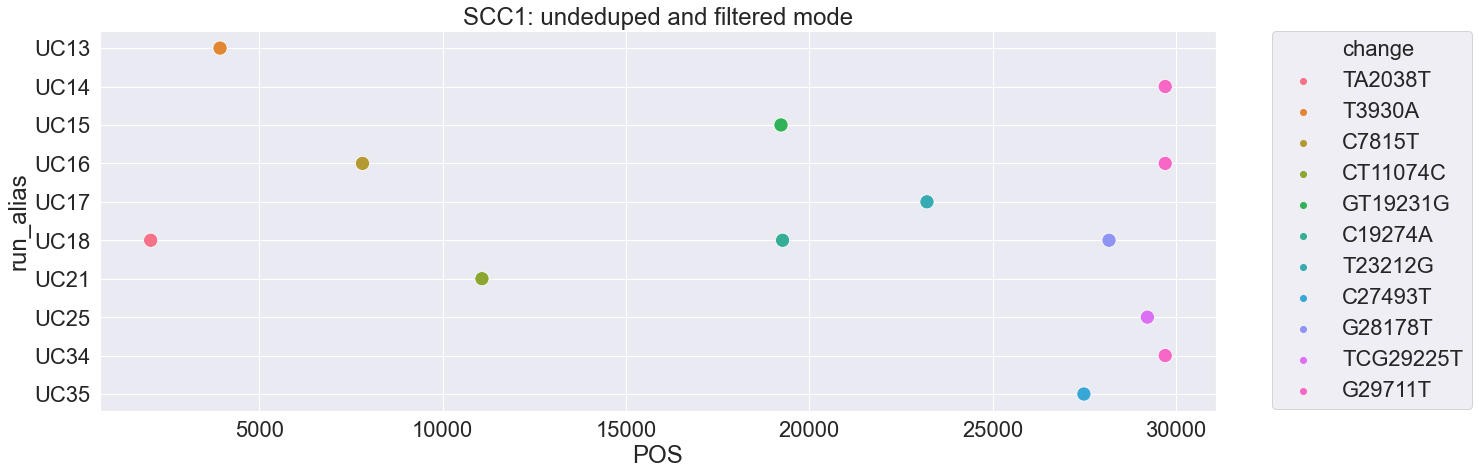

In [47]:
plt.figure(figsize=(20,7))
sns.set(font_scale=2)
sns.scatterplot(x='POS',y='run_alias',data=pysqldf('select * from va_undeduped_filtered where lin = "SCC1" and AF >=0.50 order by run_alias desc'),hue='change',hue_order=pysqldf('select POS, change from va_undeduped_filtered where lin = "SCC1" and AF >=0.50 group by POS')['change'].to_list(),s=200)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("SCC1: undeduped and filtered mode")


Text(0.5, 1.0, 'SCC1: undeduped and unfiltered mode')

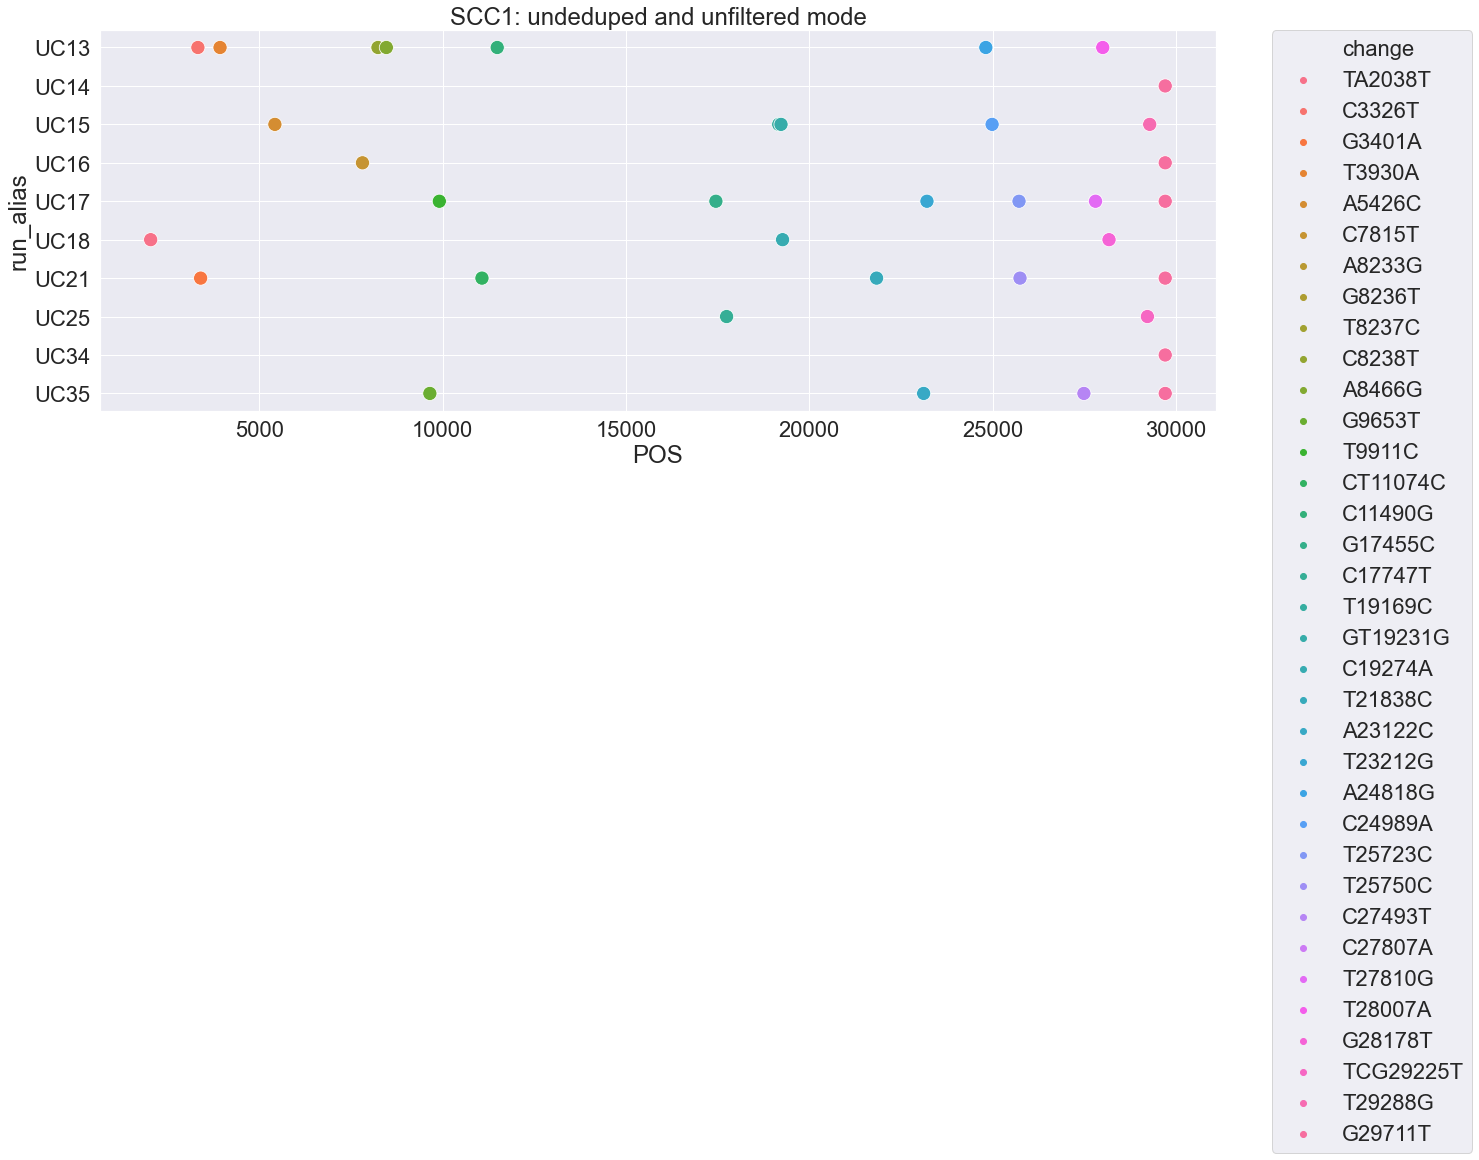

In [48]:
plt.figure(figsize=(20,7))
sns.set(font_scale=2)
sns.scatterplot(x='POS',y='run_alias',data=pysqldf('select * from va_undeduped_unfiltered where lin = "SCC1" and AF >=0.50 order by run_alias desc'),hue='change',hue_order=pysqldf('select POS, change from va_undeduped_unfiltered where lin = "SCC1" and AF >=0.50 group by POS')['change'].to_list(),s=200)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("SCC1: undeduped and unfiltered mode")


Text(0.5, 1.0, 'SCC1: deduped and filtered mode')

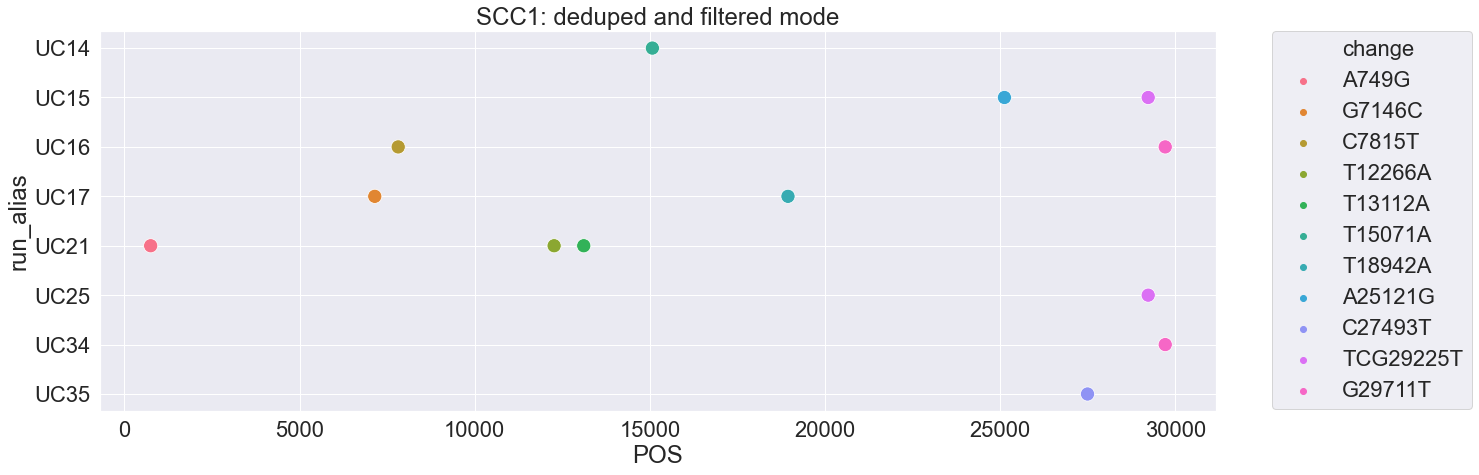

In [49]:
plt.figure(figsize=(20,7))
sns.set(font_scale=2)
sns.scatterplot(x='POS',y='run_alias',data=pysqldf('select * from va_deduped_filtered where lin = "SCC1" and AF >=0.50 order by run_alias desc'),hue='change',hue_order=pysqldf('select POS, change from va_deduped_filtered where lin = "SCC1" and AF >=0.50 group by POS')['change'].to_list(),s=200)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("SCC1: deduped and filtered mode")


Text(0.5, 1.0, 'SCC1: deduped and unfiltered mode')

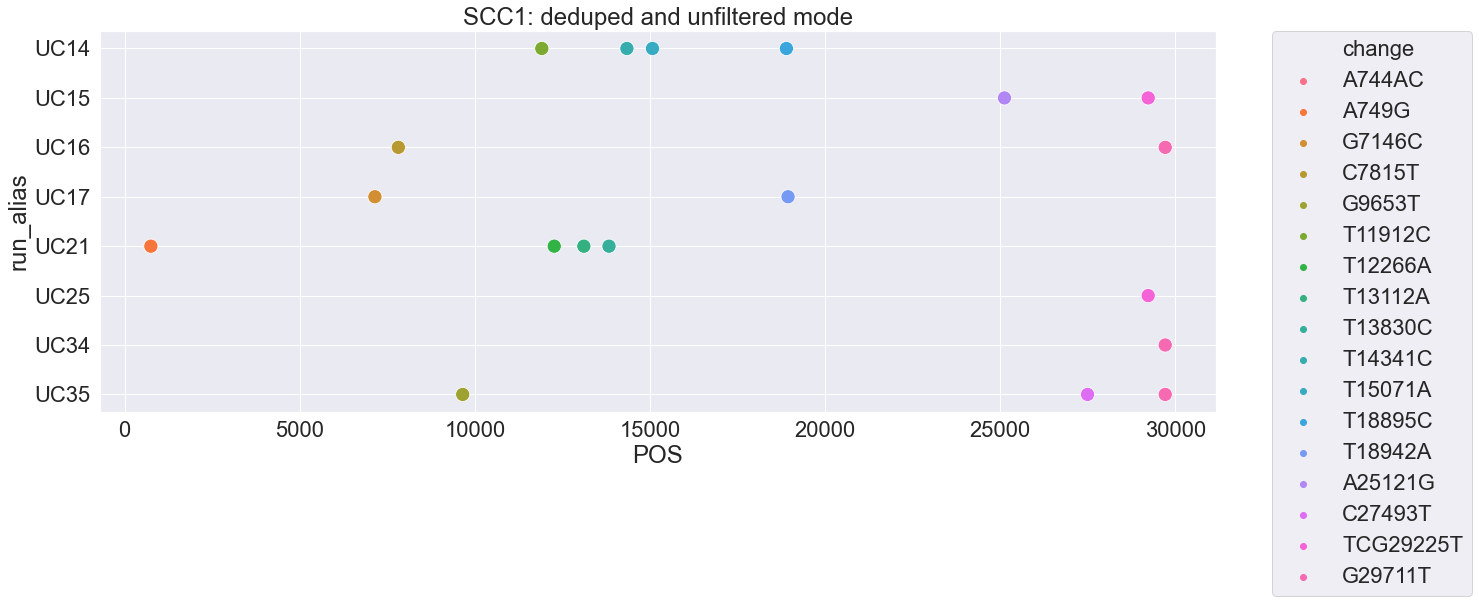

In [50]:
plt.figure(figsize=(20,7))
sns.set(font_scale=2)
sns.scatterplot(x='POS',y='run_alias',data=pysqldf('select * from va_deduped_unfiltered where lin = "SCC1" and AF >=0.50 order by run_alias desc'),hue='change',hue_order=pysqldf('select POS, change from va_deduped_unfiltered where lin = "SCC1" and AF >=0.50 group by POS')['change'].to_list(),s=200)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("SCC1: deduped and unfiltered mode")


In [51]:
# List the samples containing either one of the SCC1 defining SNV—G29711T—in the undeduped and unfiltered mode. 
pysqldf('select * from va_undeduped_unfiltered where change = "G29711T"')


,Sample,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,change,study_accession,library_strategy,library_source,library_selection,run_alias,type,func,start,end,A,C,G,T,loc,lin
0,SRR11859144,29711,G,T,810.0,24,0.958333,2147483647,"0,0,0,24",.,.,.,.,.,G29711T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC35,3'UTR,.,29674,29903,93,36,47,53,SantaClara,SCC1
1,SRR11859145,29711,G,T,17092.0,568,0.892606,0,"0,56,0,508",.,.,.,.,.,G29711T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC34,3'UTR,.,29674,29903,93,36,47,53,SantaClara,SCC1
2,SRR11859157,29711,G,T,694.0,18,1.000000,2147483647,"0,0,0,18",.,.,.,.,.,G29711T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC21,3'UTR,.,29674,29903,93,36,47,53,SantaClara,SCC1
3,SRR11859162,29711,G,T,1154.0,30,1.000000,2147483647,"0,0,30,0",.,.,.,.,.,G29711T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC17,3'UTR,.,29674,29903,93,36,47,53,SantaClara,SCC1
4,SRR11859163,29711,G,T,2147.0,57,1.000000,0,"0,0,34,23",.,.,.,.,.,G29711T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC16,3'UTR,.,29674,29903,93,36,47,53,SantaClara,SCC1
5,SRR11859165,29711,G,T,4094.0,105,0.990476,0,"0,0,69,36",.,.,.,.,.,G29711T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC14,3'UTR,.,29674,29903,93,36,47,53,SantaClara,SCC1


Display variants in WA1

Text(0.5, 1.0, 'WA1: undeduped and filtered mode')

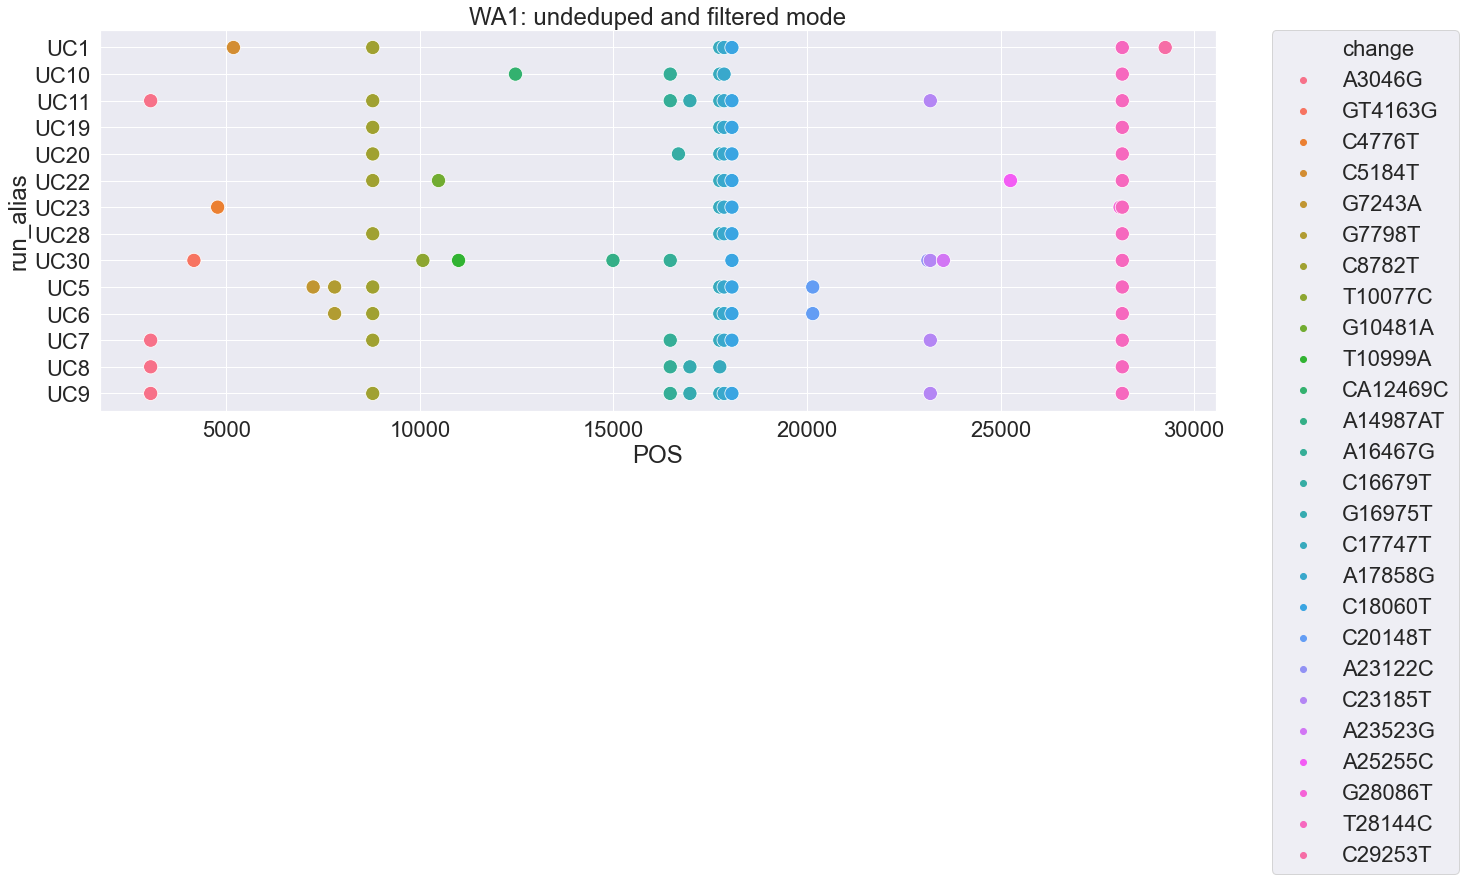

In [52]:
plt.figure(figsize=(20,7))
sns.set(font_scale=2)
sns.scatterplot(x='POS',y='run_alias',data=pysqldf('select * from va_undeduped_filtered where lin = "WA1" and AF >=0.50 order by run_alias desc'),hue='change',hue_order=pysqldf('select POS, change from va_undeduped_filtered where lin = "WA1" and AF >=0.50 group by POS')['change'].to_list(),s=200)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("WA1: undeduped and filtered mode")


Text(0.5, 1.0, 'WA1: undeduped and unfiltered mode')

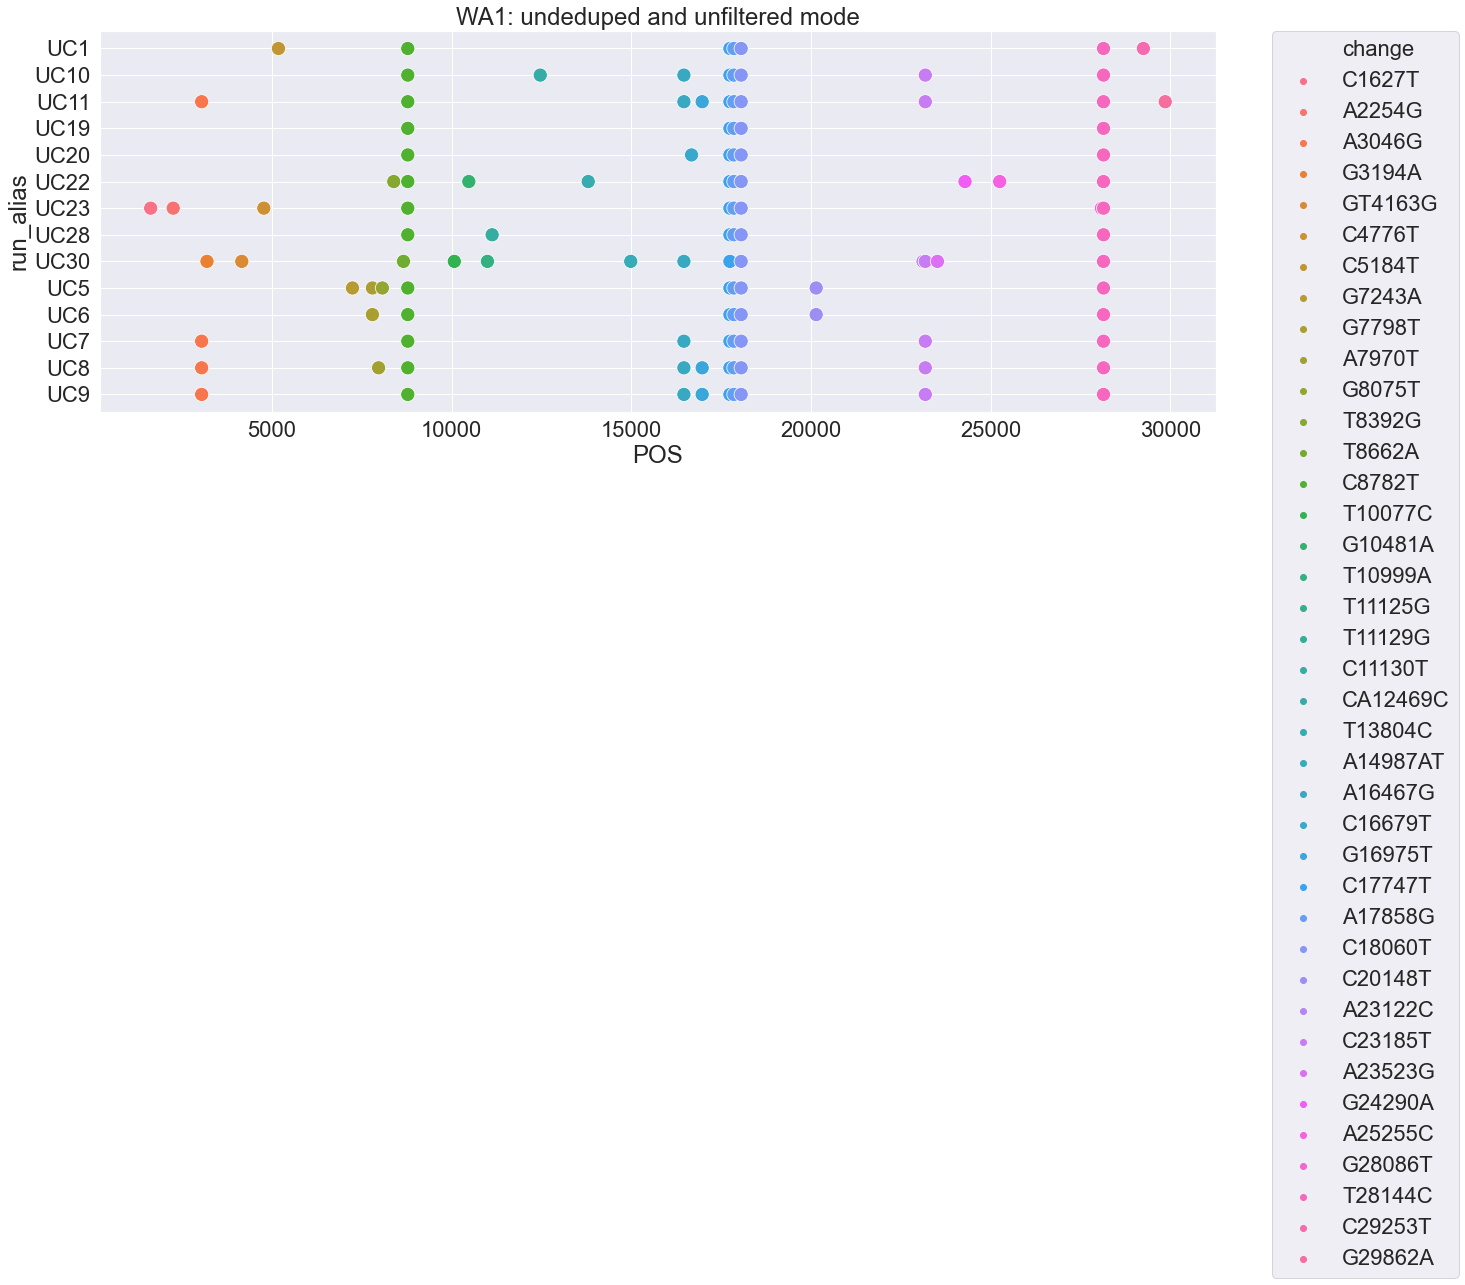

In [53]:
plt.figure(figsize=(20,7))
sns.set(font_scale=2)
sns.scatterplot(x='POS',y='run_alias',data=pysqldf('select * from va_undeduped_unfiltered where lin = "WA1" and AF >=0.50 order by run_alias desc'),hue='change',hue_order=pysqldf('select POS, change from va_undeduped_unfiltered where lin = "WA1" and AF >=0.50 group by POS')['change'].to_list(),s=200)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("WA1: undeduped and unfiltered mode")


Text(0.5, 1.0, 'WA1: deduped and filtered mode')

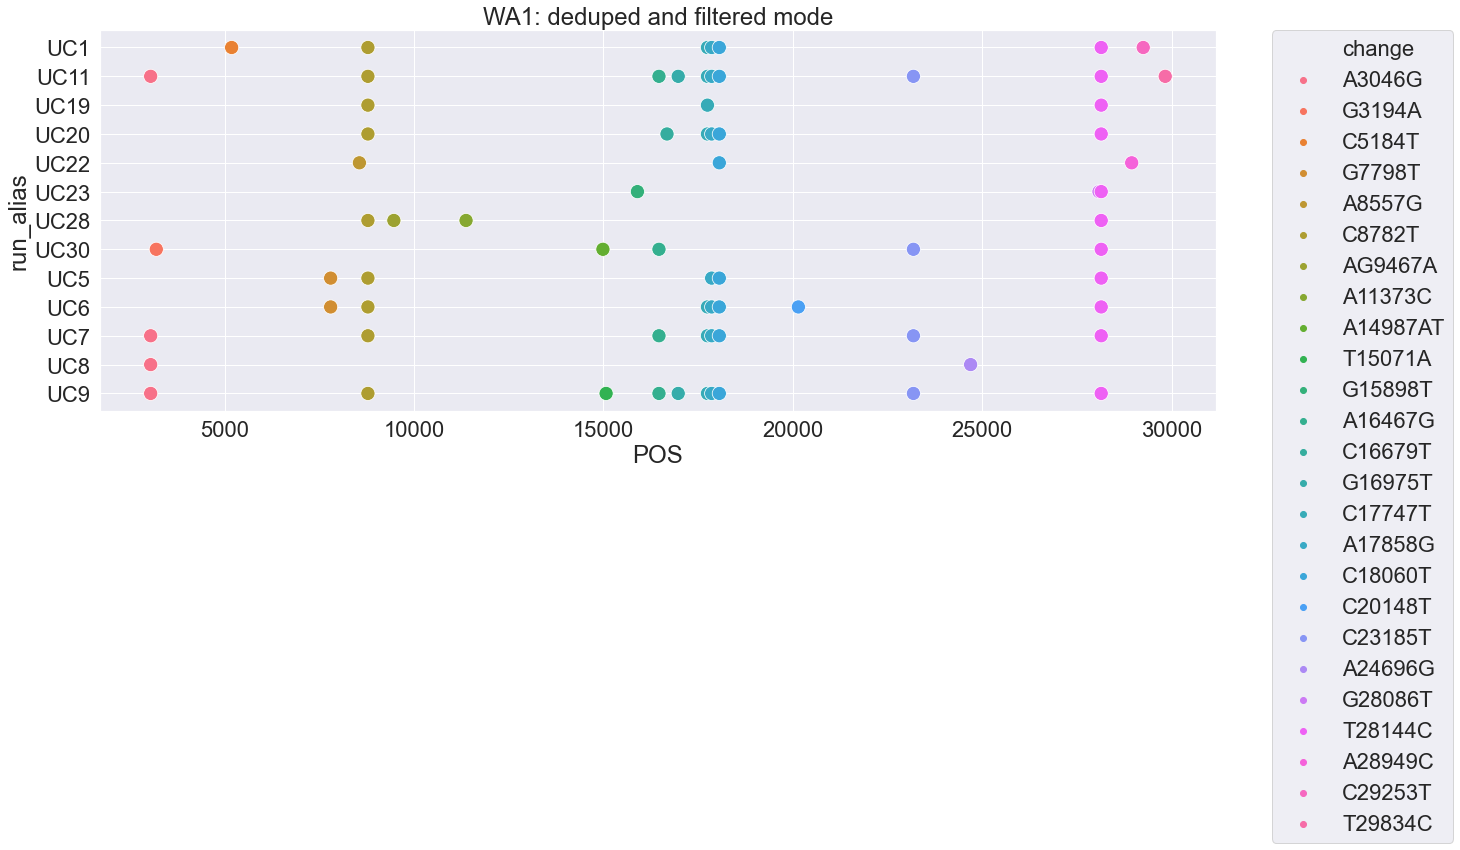

In [54]:
plt.figure(figsize=(20,7))
sns.set(font_scale=2)
sns.scatterplot(x='POS',y='run_alias',data=pysqldf('select * from va_deduped_filtered where lin = "WA1" and AF >=0.50 order by run_alias desc'),hue='change',hue_order=pysqldf('select POS, change from va_deduped_filtered where lin = "WA1" and AF >=0.50 group by POS')['change'].to_list(),s=200)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("WA1: deduped and filtered mode")


Text(0.5, 1.0, 'WA1: deduped and unfiltered mode')

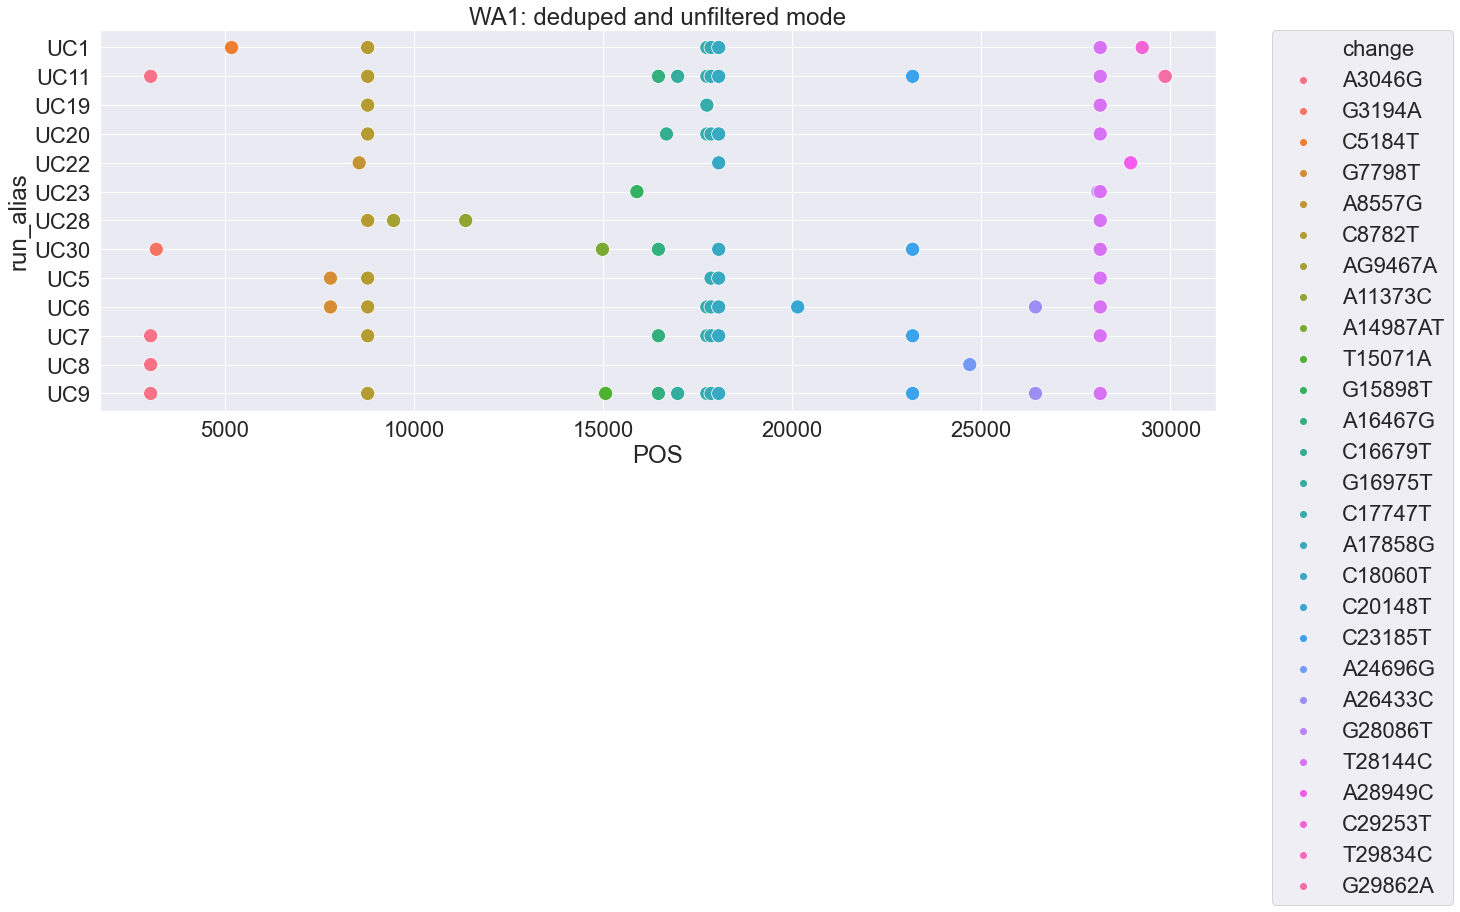

In [55]:
plt.figure(figsize=(20,7))
sns.set(font_scale=2)
sns.scatterplot(x='POS',y='run_alias',data=pysqldf('select * from va_deduped_unfiltered where lin = "WA1" and AF >=0.50 order by run_alias desc'),hue='change',hue_order=pysqldf('select POS, change from va_deduped_unfiltered where lin = "WA1" and AF >=0.50 group by POS')['change'].to_list(),s=200)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("WA1: deduped and unfiltered mode")


In [56]:
# List the samples containing either one of the three WA1 defining SNVs—C8782T, C18060T, T28144C—in the undeduped and unfiltered mode. 
pysqldf('select * from va_undeduped_unfiltered where change = "C8782T" or change = "C18060T" or change = "T28144C"')

,Sample,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,change,study_accession,library_strategy,library_source,library_selection,run_alias,type,func,start,end,A,C,G,T,loc,lin
0,SRR11859140,8782,C,T,25687.0,806,0.981390,23,"7,0,362,437",LOW,SILENT,SYNONYMOUS_CODING,orf1ab,agC/agT,C8782T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC42,mat_peptide,nsp4,8554,10054,399,266,281,554,None,None
1,SRR11859170,8782,C,T,28426.0,938,0.924307,0,"0,0,429,509",LOW,SILENT,SYNONYMOUS_CODING,orf1ab,agC/agT,C8782T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC1,mat_peptide,nsp4,8554,10054,399,266,281,554,gpA,WA1
2,SRR11859128,8782,C,T,645.0,21,0.904762,2147483647,"0,0,0,21",LOW,SILENT,SYNONYMOUS_CODING,orf1ab,agC/agT,C8782T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC10,mat_peptide,nsp4,8554,10054,399,266,281,554,gpB,WA1
3,SRR11859129,8782,C,T,49314.0,28040,0.950927,249,"99,8,12511,15405",LOW,SILENT,SYNONYMOUS_CODING,orf1ab,agC/agT,C8782T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC9,mat_peptide,nsp4,8554,10054,399,266,281,554,gpB,WA1
4,SRR11859130,8782,C,T,8117.0,242,0.958678,2147483647,"0,0,0,242",LOW,SILENT,SYNONYMOUS_CODING,orf1ab,agC/agT,C8782T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC8,mat_peptide,nsp4,8554,10054,399,266,281,554,gpB,WA1
5,SRR11859131,8782,C,T,6382.0,208,0.889423,0,"0,0,111,96",LOW,SILENT,SYNONYMOUS_CODING,orf1ab,agC/agT,C8782T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC7,mat_peptide,nsp4,8554,10054,399,266,281,554,gpB,WA1
6,SRR11859132,8782,C,T,3392.0,114,0.938596,0,"0,0,52,62",LOW,SILENT,SYNONYMOUS_CODING,orf1ab,agC/agT,C8782T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC6,mat_peptide,nsp4,8554,10054,399,266,281,554,gpB,WA1
7,SRR11859136,8782,C,T,2776.0,90,0.911111,0,"0,0,49,40",LOW,SILENT,SYNONYMOUS_CODING,orf1ab,agC/agT,C8782T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC5,mat_peptide,nsp4,8554,10054,399,266,281,554,gpB,WA1
8,SRR11859150,8782,C,T,10513.0,345,0.915942,0,"0,0,176,168",LOW,SILENT,SYNONYMOUS_CODING,orf1ab,agC/agT,C8782T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC28,mat_peptide,nsp4,8554,10054,399,266,281,554,None,WA1
9,SRR11859155,8782,C,T,1118.0,37,0.972973,2147483647,"0,0,0,37",LOW,SILENT,SYNONYMOUS_CODING,orf1ab,agC/agT,C8782T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC23,mat_peptide,nsp4,8554,10054,399,266,281,554,None,WA1


Display variants in Solano lineage

Text(0.5, 1.0, 'Solano: undeduped and filtered mode')

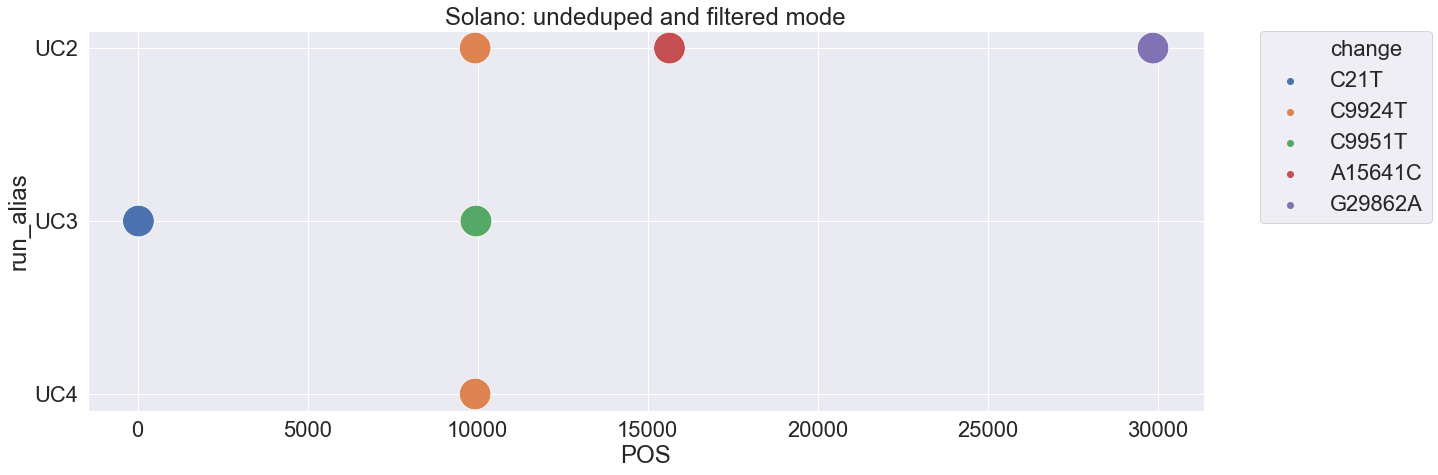

In [57]:
plt.figure(figsize=(20,7))
sns.set(font_scale=2)
sns.scatterplot(x='POS',y='run_alias',data=pysqldf('select * from va_undeduped_filtered where lin = "Solano" and AF >=0.50 order by run_alias desc'),hue='change',hue_order=pysqldf('select POS, change from va_undeduped_filtered where lin = "Solano" and AF >=0.50 group by POS')['change'].to_list(),s=1000)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Solano: undeduped and filtered mode")


Text(0.5, 1.0, 'Solano: undeduped and unfiltered mode')

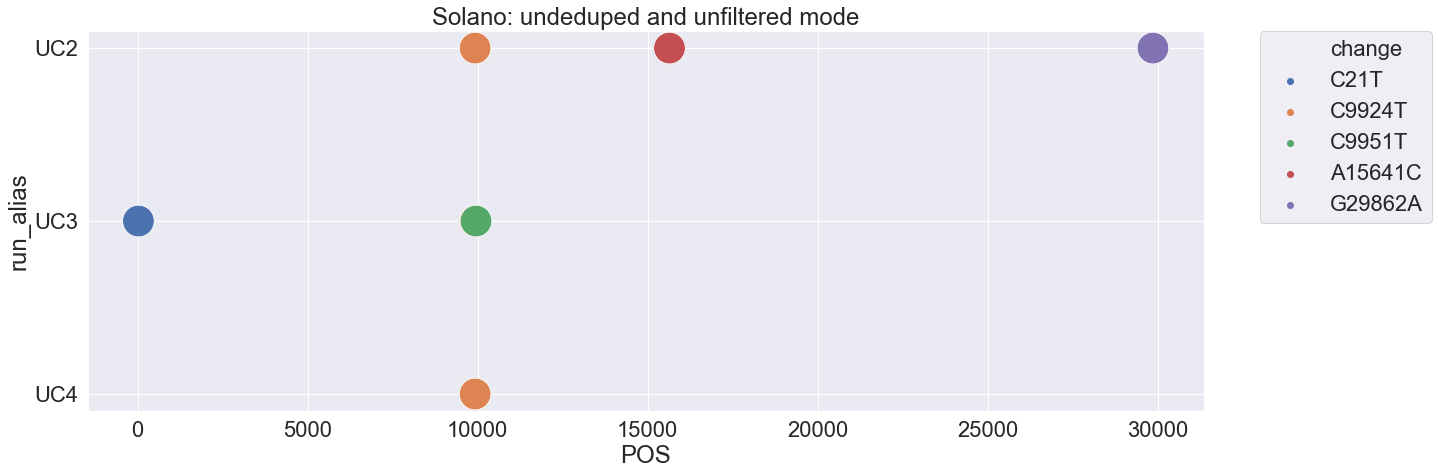

In [58]:
plt.figure(figsize=(20,7))
sns.set(font_scale=2)
sns.scatterplot(x='POS',y='run_alias',data=pysqldf('select * from va_undeduped_unfiltered where lin = "Solano" and AF >=0.50 order by run_alias desc'),hue='change',hue_order=pysqldf('select POS, change from va_undeduped_unfiltered where lin = "Solano" and AF >=0.50 group by POS')['change'].to_list(),s=1000)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Solano: undeduped and unfiltered mode")


Text(0.5, 1.0, 'Solano: deduped and filtered mode')

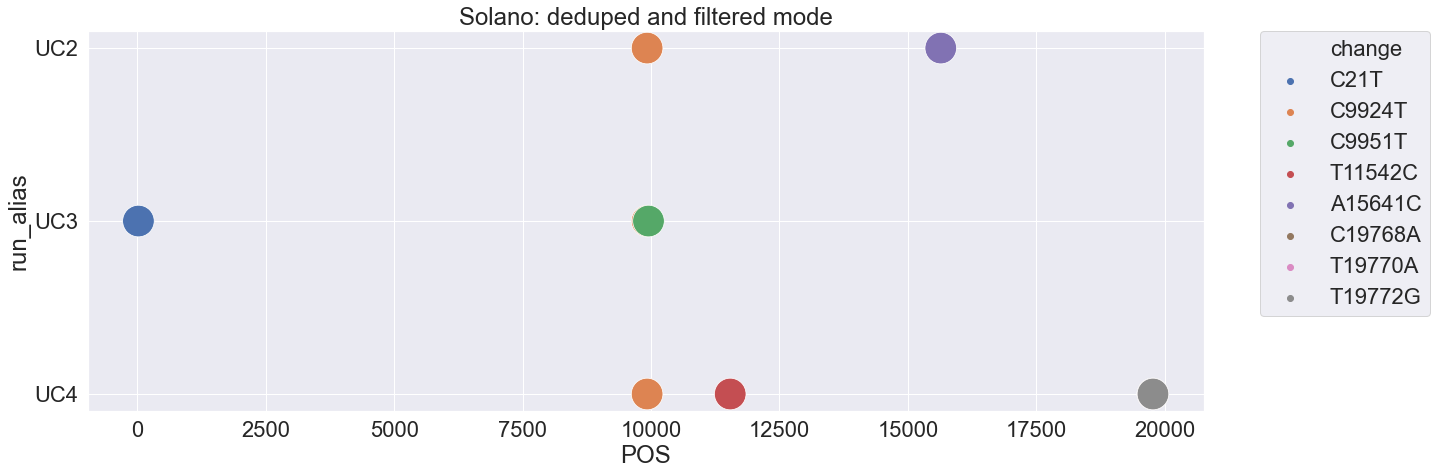

In [59]:
plt.figure(figsize=(20,7))
sns.set(font_scale=2)
sns.scatterplot(x='POS',y='run_alias',data=pysqldf('select * from va_deduped_filtered where lin = "Solano" and AF >=0.50 order by run_alias desc'),hue='change',hue_order=pysqldf('select POS, change from va_deduped_filtered where lin = "Solano" and AF >=0.50 group by POS')['change'].to_list(),s=1000)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Solano: deduped and filtered mode")


Text(0.5, 1.0, 'Solano: deduped and unfiltered mode')

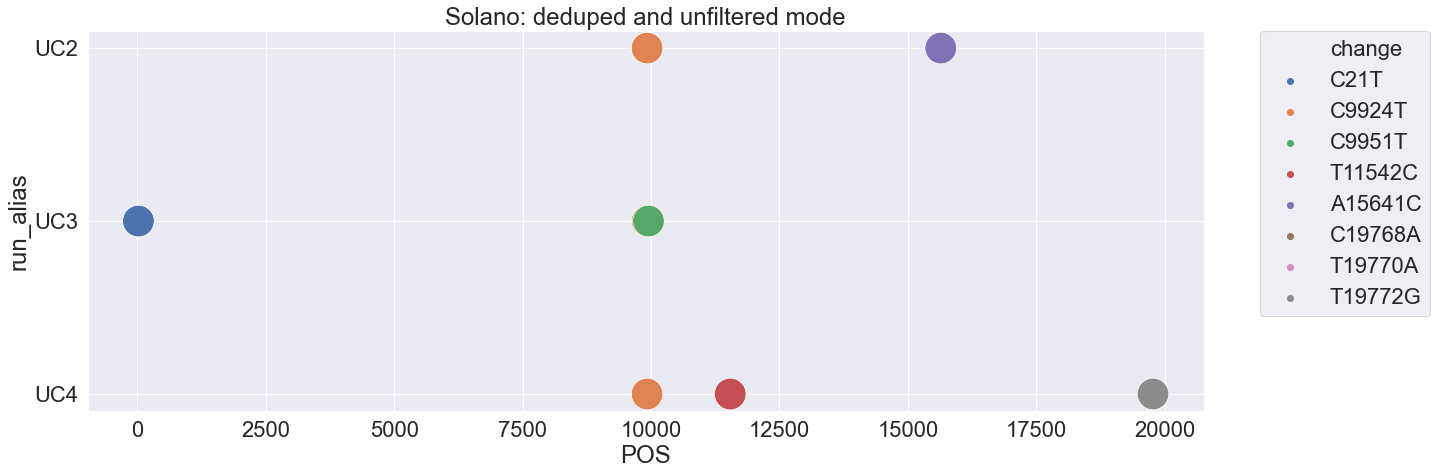

In [60]:
plt.figure(figsize=(20,7))
sns.set(font_scale=2)
sns.scatterplot(x='POS',y='run_alias',data=pysqldf('select * from va_deduped_unfiltered where lin = "Solano" and AF >=0.50 order by run_alias desc'),hue='change',hue_order=pysqldf('select POS, change from va_deduped_unfiltered where lin = "Solano" and AF >=0.50 group by POS')['change'].to_list(),s=1000)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Solano: deduped and unfiltered mode")


In [61]:
# List the samples containing the Solano defining SNV—C9924T—in the undeduped and unfiltered mode. 
pysqldf('select * from va_undeduped_unfiltered where change = "C9924T"')


,Sample,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,change,study_accession,library_strategy,library_source,library_selection,run_alias,type,func,start,end,A,C,G,T,loc,lin
0,SRR11859147,9924,C,T,5979.0,262,0.748092,1,"38,27,108,89",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,gCa/gTa,C9924T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC4,mat_peptide,nsp4,8554,10054,399,266,281,554,Solano,Solano
1,SRR11859169,9924,C,T,49314.0,1475,0.989153,0,"0,0,852,621",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,gCa/gTa,C9924T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC2,mat_peptide,nsp4,8554,10054,399,266,281,554,Solano,Solano
2,SRR11859158,9924,C,T,2010.0,56,1.000000,0,"0,0,45,11",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,gCa/gTa,C9924T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC3,mat_peptide,nsp4,8554,10054,399,266,281,554,Solano,Solano


In [62]:
# UC3 does not show C9924T very well, because of C9951T on top of C9924T in the figure. 
# C9951T turns out with AF = 0.96, and is only present in UC3 across the 43 samples. 
# However, Figure 3 in Deng2020 does not show C9951T in UC3. 
pysqldf('select * from va_undeduped_unfiltered where change = "C9951T"')

,Sample,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,change,study_accession,library_strategy,library_source,library_selection,run_alias,type,func,start,end,A,C,G,T,loc,lin
0,SRR11859158,9951,C,T,3586.0,103,0.961165,0,"2,1,65,34",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,gCt/gTt,C9951T,SRP265005,AMPLICON,METAGENOMIC,PCR,UC3,mat_peptide,nsp4,8554,10054,399,266,281,554,Solano,Solano
